<a href="https://colab.research.google.com/github/r-matsuzaka/atcoder/blob/main/colab/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Annealing


### [Simulated Annealing From Scratch in Python](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

In [1]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from matplotlib import pyplot

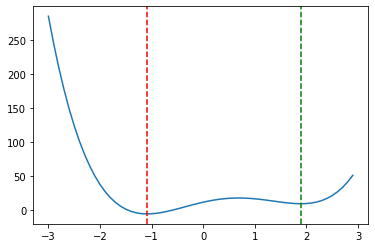

In [2]:
# objective function f(x) = 5x + 3(x+1)^2(x-2)^2
# df/dx = (x+1)(x-2)(2x-1)+5/6
# df/dx = 0
# x1 = -1.0852
# x2 = 0.688145
# x3 = 1.89705

def objective(x):
  x = x[0]
  return 5*x + 3*(x+1)**2 * (x-2)**2

# define range for input
r_min, r_max = -3.0, 3.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# print(inputs)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = -1.0852
x_local_optima = 1.89705
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
pyplot.axvline(x=x_local_optima, ls='--', color='green')
# show the plot
pyplot.show()

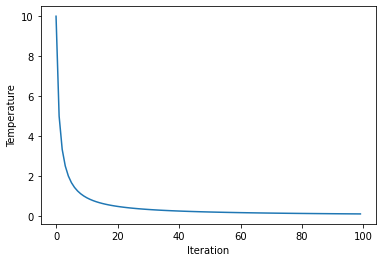

In [3]:
# explore temperature vs algorithm iteration for simulated annealing
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# plot iterations vs temperatures
pyplot.plot(iterations, temperatures)
pyplot.xlabel('Iteration')
pyplot.ylabel('Temperature')
pyplot.show()

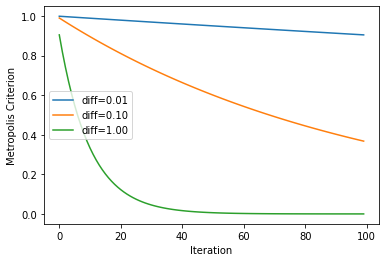

In [4]:
# explore metropolis acceptance criterion for simulated annealing
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
	metropolis = [exp(-d/t) for t in temperatures]
	# plot iterations vs metropolis
	label = 'diff=%.2f' % d
	pyplot.plot(iterations, metropolis, label=label)
# inalize plot
pyplot.xlabel('Iteration')
pyplot.ylabel('Metropolis Criterion')
pyplot.legend()
pyplot.show()

In [5]:
# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	scores = list()
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# keep track of scores
			scores.append(best_eval)
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]


def run_simulated_annealing(n_seed = 1):
  # seed the pseudorandom number generator
  seed(n_seed)
  # define range for input
  bounds = asarray([[-5.0, 5.0]])
  # define the total iterations
  n_iterations = 1000
  # define the maximum step size
  step_size = 0.1
  # initial temperature
  temp = 10
  # perform the simulated annealing search
  best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
  print('Done!')
  print('f(%s) = %f' % (best, score))
  # line plot of best scores
  pyplot.plot(scores, '.-')
  pyplot.xlabel('Improvement Number')
  pyplot.ylabel('Evaluation f(x)')
  pyplot.show()

>0 f([-0.90999724]) = -4.34420
>1 f([-0.95488502]) = -4.72111
>2 f([-1.06547853]) = -5.20652
>8 f([-1.0735412]) = -5.21443
>21 f([-1.09142562]) = -5.21748
>45 f([-1.08059768]) = -5.21805
>55 f([-1.08389312]) = -5.21866
>168 f([-1.08489308]) = -5.21871
>575 f([-1.08541318]) = -5.21871
>708 f([-1.08537294]) = -5.21871
Done!
f([-1.08537294]) = -5.218714


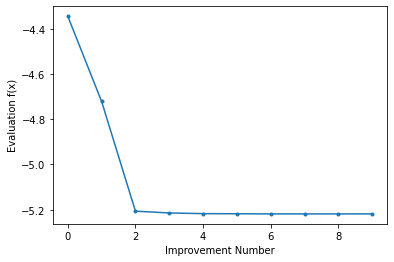

In [6]:
run_simulated_annealing(1)

>1 f([2.70343884]) = 33.87750
>2 f([2.54889882]) = 24.12845
>3 f([2.54806043]) = 24.08414
>5 f([2.53818547]) = 23.56886
>7 f([2.47991231]) = 20.76679
>9 f([2.46288143]) = 20.02231
>14 f([2.39945601]) = 17.52923
>20 f([2.37272429]) = 16.60449
>21 f([2.31779339]) = 14.92407
>23 f([2.27017919]) = 13.69279
>24 f([2.22061737]) = 12.61762
>27 f([2.14742042]) = 11.38297
>28 f([2.11327679]) = 10.93950
>30 f([2.03281768]) = 10.19381
>31 f([2.01154791]) = 10.06137
>32 f([1.97763389]) = 9.90148
>39 f([1.96458313]) = 9.85599
>40 f([1.94136491]) = 9.79606
>41 f([1.89119202]) = 9.75285
>131 f([1.89466342]) = 9.75223
>194 f([1.8950048]) = 9.75220
>249 f([1.89787076]) = 9.75213
>277 f([1.89705739]) = 9.75211
Done!
f([1.89705739]) = 9.752112


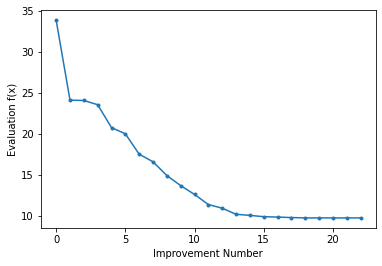

In [7]:
run_simulated_annealing(10)

### [Introduction to Heuristics Contest](https://atcoder.jp/contests/intro-heuristics)

# 参考文献
- [wolframalpha](https://ja.wolframalpha.com/input?i=%28x%2B1%29%28x-2%29%282x-1%29%2B5%2F6%E3%82%92%E5%9B%A0%E6%95%B0%E5%88%86%E8%A7%A3)
- [GeoGebra](https://www.geogebra.org/graphing?lang=ja)
- [Simulated Annealing From Scratch in Python](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)
- [Introduction to Heuristics Contest](https://atcoder.jp/contests/intro-heuristics)
- [焼きなまし法のコツ Ver. 1.3](https://shindannin.hatenadiary.com/entry/2021/03/06/115415)
- [誰でもできる焼きなまし法](https://gasin.hatenadiary.jp/entry/2019/09/03/162613)
- [Simulated Annealing Algorithm Explained from Scratch (Python)](https://www.machinelearningplus.com/machine-learning/simulated-annealing-algorithm-explained-from-scratch-python/)

